# Herausforderung: Analyse von Text über Data Science

> *In diesem Notebook experimentieren wir mit der Verwendung verschiedener URLs - Wikipedia-Artikel über Machine Learning. Sie können sehen, dass dieser Artikel, im Gegensatz zu Data Science, viele Fachbegriffe enthält, was die Analyse problematischer macht. Wir müssen uns eine andere Methode überlegen, um die Daten nach der Schlüsselwort-Extraktion zu bereinigen, um einige häufige, aber nicht aussagekräftige Wortkombinationen zu entfernen.*

In diesem Beispiel machen wir eine einfache Übung, die alle Schritte eines traditionellen Data-Science-Prozesses abdeckt. Sie müssen keinen Code schreiben, sondern können einfach auf die untenstehenden Zellen klicken, um sie auszuführen und das Ergebnis zu beobachten. Als Herausforderung werden Sie ermutigt, diesen Code mit unterschiedlichen Daten auszuprobieren.

## Ziel

In dieser Lektion haben wir verschiedene Konzepte im Zusammenhang mit Data Science besprochen. Lassen Sie uns versuchen, weitere verwandte Konzepte durch **Text Mining** zu entdecken. Wir beginnen mit einem Text über Data Science, extrahieren Schlüsselwörter daraus und versuchen dann, das Ergebnis zu visualisieren.

Als Text werde ich die Seite über Data Science von Wikipedia verwenden:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Schritt 1: Daten beschaffen

Der erste Schritt in jedem Data-Science-Prozess ist das Beschaffen der Daten. Wir verwenden dazu die Bibliothek `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Schritt 2: Umwandlung der Daten

Der nächste Schritt besteht darin, die Daten in eine für die Verarbeitung geeignete Form zu bringen. In unserem Fall haben wir den HTML-Quellcode der Seite heruntergeladen und müssen ihn in reinen Text umwandeln.

Es gibt viele Möglichkeiten, dies zu tun. Wir werden das einfachste, eingebaute [HTMLParser](https://docs.python.org/3/library/html.parser.html)-Objekt aus Python verwenden. Dazu müssen wir die `HTMLParser`-Klasse erweitern und den Code definieren, der den gesamten Text innerhalb der HTML-Tags sammelt, mit Ausnahme der `<script>`- und `<style>`-Tags.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Schritt 3: Erkenntnisse gewinnen

Der wichtigste Schritt besteht darin, unsere Daten in eine Form zu bringen, aus der wir Erkenntnisse gewinnen können. In unserem Fall möchten wir Schlüsselwörter aus dem Text extrahieren und herausfinden, welche Schlüsselwörter besonders aussagekräftig sind.

Wir verwenden die Python-Bibliothek [RAKE](https://github.com/aneesha/RAKE) für die Schlüsselwort-Extraktion. Zuerst installieren wir diese Bibliothek, falls sie noch nicht vorhanden ist:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Die Hauptfunktionalität ist über das `Rake`-Objekt verfügbar, das wir mit einigen Parametern anpassen können. In unserem Fall setzen wir die Mindestlänge eines Schlüsselworts auf 5 Zeichen, die Mindesthäufigkeit eines Schlüsselworts im Dokument auf 3 und die maximale Anzahl von Wörtern in einem Schlüsselwort auf 2. Experimentieren Sie gerne mit anderen Werten und beobachten Sie das Ergebnis.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Wir haben eine Liste von Begriffen zusammen mit dem zugehörigen Wichtigkeitsgrad erhalten. Wie Sie sehen können, stehen die relevantesten Disziplinen, wie Machine Learning und Big Data, in der Liste an den obersten Positionen.

## Schritt 4: Visualisierung des Ergebnisses

Menschen können Daten am besten in visueller Form interpretieren. Daher macht es oft Sinn, die Daten zu visualisieren, um einige Erkenntnisse zu gewinnen. Wir können die Bibliothek `matplotlib` in Python verwenden, um eine einfache Verteilung der Schlüsselwörter mit ihrer Relevanz darzustellen:


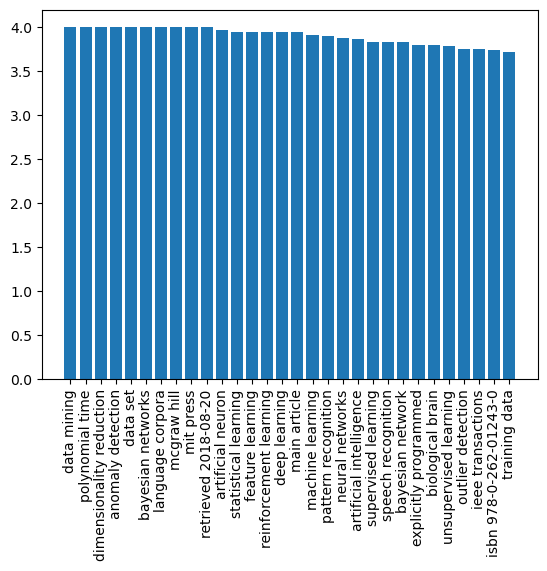

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Es gibt jedoch eine noch bessere Möglichkeit, Wortfrequenzen zu visualisieren - mit **Word Cloud**. Wir müssen eine weitere Bibliothek installieren, um die Wortwolke aus unserer Schlüsselwortliste zu erstellen.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-Objekt ist dafür verantwortlich, entweder den Originaltext oder eine vorab berechnete Liste von Wörtern mit ihren Häufigkeiten aufzunehmen und ein Bild zurückzugeben, das dann mit `matplotlib` angezeigt werden kann:


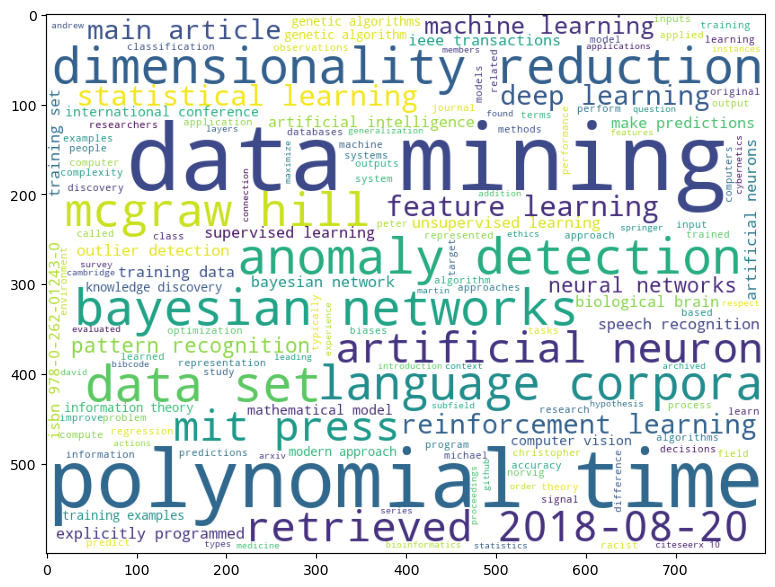

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Wir können auch den ursprünglichen Text an `WordCloud` übergeben - mal sehen, ob wir ein ähnliches Ergebnis erzielen können:


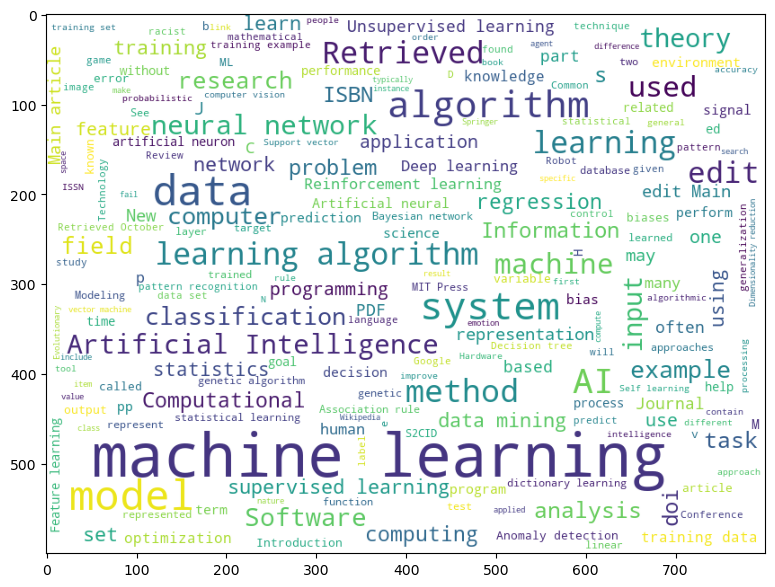

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Man sieht, dass die Wortwolke jetzt beeindruckender aussieht, aber sie enthält auch viel "Rauschen" (z. B. nicht zusammenhängende Wörter wie `Retrieved on`). Außerdem erhalten wir weniger Schlüsselwörter, die aus zwei Wörtern bestehen, wie *Data Scientist* oder *Computer Science*. Das liegt daran, dass der RAKE-Algorithmus eine deutlich bessere Arbeit bei der Auswahl guter Schlüsselwörter aus dem Text leistet. Dieses Beispiel verdeutlicht die Bedeutung der Datenvorverarbeitung und -bereinigung, da ein klares Bild am Ende uns ermöglicht, bessere Entscheidungen zu treffen.

In dieser Übung haben wir einen einfachen Prozess durchlaufen, um aus Wikipedia-Texten einige Bedeutungen in Form von Schlüsselwörtern und einer Wortwolke zu extrahieren. Dieses Beispiel ist zwar recht einfach, zeigt aber gut alle typischen Schritte, die ein Data Scientist bei der Arbeit mit Daten durchläuft – angefangen bei der Datenbeschaffung bis hin zur Visualisierung.

In unserem Kurs werden wir all diese Schritte im Detail besprechen.



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, weisen wir darauf hin, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
